# Using rapidfuzz to extract affiliatuons from QJE

First the JSON output file from tezseract is read in and made into a useable dataframe

In [5]:
#Importing the libraries
import json
import pandas as pd
from rapidfuzz import process

# Import JSON file
f = open('/Users/MattJohnson/Desktop/Affiliations/1_Input files and processing input files/1_1_Input files/Tesseract affiliation output/QJE/QJE_aff_ref_output_1977_2010.json')
json_data = json.load(f)

# Define Journal and Dataframe
Journal_Name = 'QJE'
Reference_Data_List = []

# Extract Json Data into dataframe
for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorsNo = len(author_list)
    stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]

    Reference_Data_List.append({'Journal_Name' : Journal_Name,
    'Authors_count' : authorsNo, 
    'Article_ID' : Article_ID, 'content_type' : content_type,
    'stable_url' : stable_url, 
    'Ref_type': Ref_type,  'ref_string':ref_string })

QJE_aff_ref_output_1940_2010 = pd.DataFrame.from_records(Reference_Data_List)     
QJE_aff_ref_output_1940_2010.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/Working files/QJE_aff_ref_output_1940_2010.xlsx')        

Next the Unique list of universities is read in, this is used as a database to check the affiliton string against using rapidfuzz. 

In [6]:
affs = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/University list/Unique Universities.xlsx')
print(affs.shape)

#testdata = QJE_1940_2010.loc[0:20].reset_index(drop = True)
testdata = QJE_aff_ref_output_1940_2010

for i in range(len(affs)):
    #Replaceing title case and stripping leading space
    affs.iat[i,0] = affs.iat[i,0].strip().title()
Affiliation_choices = affs['Affilliation'].values.tolist()

for i in range(len(testdata)):
    #Replaceing title case and stripping leading space
    testdata.iat[i,6] = testdata.iat[i,6].strip().title()


(683, 5)


Next the test data is split line by line and parsed through the fuzzy matching library rapid fuzz.  Using the process.extract function a list of variables from a data frame being the unique universities is checked to see if there is a match in the input line from tesseract.

In [7]:
# For loop to iterate through lines in the input data and check to see if this exists in the created data base. 
# If it exists it is appended to a dataframe as the next affiliton for that paper
for i in range(len(testdata)):
    split = testdata.iat[i,6].split('\n\n')
    split_len = len(testdata.iat[i,6].split('\n\n'))
    affiliations = []
    count_no_aff = 0
    for j in range(split_len):
        #print(i)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) > 0:
            affiliations = affiliations + process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) == 0:
            count_no_aff = count_no_aff+1

        if count_no_aff == 8:
            break
        if j == split_len:
            break

    print("Length = " , len(affiliations), ", Number = ",i)
    if len(affiliations) == 0:
        testdata.loc[i,['Missing aff']] = "Missing"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 1:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 2:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 3:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 4:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 5:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
        print(affiliations)
    elif len(affiliations) == 6:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 7:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 8:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 9:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 10:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 11:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 12:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['aff12']] = affiliations[11][0]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    else: 
        testdata.loc[i,['Missing aff']] = "More than 12"


Length =  1 , Number =  0
Length =  4 , Number =  1
Length =  4 , Number =  2
Length =  4 , Number =  3
Length =  1 , Number =  4
Length =  2 , Number =  5
Length =  3 , Number =  6
Length =  0 , Number =  7
Length =  4 , Number =  8
Length =  3 , Number =  9
Length =  4 , Number =  10
Length =  4 , Number =  11
Length =  0 , Number =  12
Length =  0 , Number =  13
Length =  5 , Number =  14
[('Harvard University', 100.0, 114), ('Riverside Harvard University', 90.0, 451), ('Ecole Polytechnique', 90.0, 147), ('Harvard University', 100.0, 114), ('Riverside Harvard University', 90.0, 451)]
Length =  3 , Number =  15
Length =  0 , Number =  16
Length =  0 , Number =  17
Length =  1 , Number =  18
Length =  2 , Number =  19
Length =  1 , Number =  20
Length =  1 , Number =  21
Length =  3 , Number =  22
Length =  3 , Number =  23
Length =  5 , Number =  24
[('National Bureau Of Economic Research', 90.0, 602), ('University Of California, San Diego', 90.0, 593), ('National Bureau Of Economic 

In [8]:
# Excel output to get an overview of the data
testdata.head
testdata.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/QJE/Test files/QJE_aff_ref_output_1940_2010_affs_out.xlsx') 

In [9]:
# This is taking a dataframe with multiple affilitaion columns and melting these to be all one column.
melted = testdata.melt(id_vars= 'Article_ID', value_vars=['aff1','aff2','aff3','aff4','aff5','aff6','aff7','aff8','aff9','aff10']).dropna()
melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)
print(melted.head())

  Article_ID Aff number         Affiliation
0   40961010       aff1  Harvard University
1   40961011       aff1      Wharton School
2   40961012       aff1     Policy Research
3   40961013       aff1  Canadian Institute
4   40961014       aff1          World Bank


In [10]:
#Reading in the master file and correctly formatting the article ID to match back onto the meltef file
QJE_master = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/1_Input files and processing input files/1_1_Input files/Master lists/Processed/QJE_processed.xlsx')

for i in range(len(QJE_master)):
    QJE_master.loc[i,['Article_ID']] = QJE_master.loc[i,['stable_url']].to_string().rsplit('/',1)[-1]

QJE_master_condenced  = QJE_master[['Article_ID','year']]
QJE_master_condenced.head()

,Article_ID,year
0,26372672,2016
1,26372673,2016
2,26372674,2016
3,26372675,2016
4,26372676,2016


In [11]:
# MErging the msterfile onto the new melted file to get additional data
QJE_melted_master = melted.merge(QJE_master_condenced, how = 'left', on = 'Article_ID')
QJE_melted_master = QJE_melted_master.sort_values(by=['year'])
QJE_melted_master.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/QJE/QJE_melted_master.xlsx') 
QJE_melted_master.head()

,Article_ID,Aff number,Affiliation,year
1858,1885418,aff2,University Of Virginia,1977
1863,1883144,aff2,Harvard University,1977
1191,1883142,aff1,Stanford University,1977
1190,1883141,aff1,Stanford University,1977
1189,1883140,aff1,Stanford University,1977


In [12]:
# Counting the number of times a certain affiliton occurs
QJE_melted_master['aff_cum_counts'] = QJE_melted_master.groupby(['Affiliation']).cumcount()+1
QJE_melted_master.head()
QJE_melted_master.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/QJE/Test files/QJE_melted_master_aff_count.xlsx') 

In [13]:
# Checking the top 20 occurances of Universities over the 70 years
highest_vals = QJE_melted_master.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
1201,40961015,aff2,National Bureau Of Economic Research,2010,233
0,40961010,aff1,Harvard University,2010,183
1200,40961013,aff2,Massachusetts Institute Of Technology,2010,148
1213,27867491,aff2,Columbia University,2010,112
7,40961018,aff1,University Of Chicago,2010,82
1202,40961016,aff2,Princeton University,2010,74
2120,27867502,aff4,Stanford University,2010,70
31,40506280,aff1,"University Of California, Berkeley",2010,47
1205,40961020,aff2,University Of Pennsylvania,2010,43
2123,27867491,aff4,Yale University,2010,33


     Article_ID Aff number             Affiliation  year  aff_cum_counts
1858    1885418       aff2  University Of Virginia  1977               1
1863    1883144       aff2      Harvard University  1977               1
1191    1883142       aff1     Stanford University  1977               1
1190    1883141       aff1     Stanford University  1977               2
1189    1883140       aff1     Stanford University  1977               3


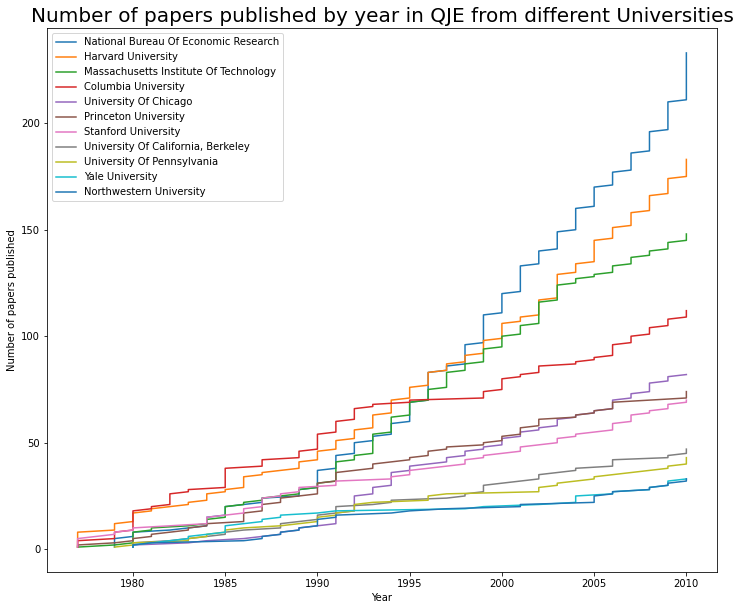

In [14]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = QJE_melted_master
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])]
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])]
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])]
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])]
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])]
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])]
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])]
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])]
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])]
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])]
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])]

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in QJE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()